In [1]:
import torch

In [5]:
#create a 4d tensor and print it.
x = torch.randn(2,2,2,2, dtype=torch.float32)
print(x.type)
print(x.size())
x

<built-in method type of Tensor object at 0x000002CBE6F96270>
torch.Size([2, 2, 2, 2])


tensor([[[[ 0.7042, -2.1602],
          [-1.4712,  0.2900]],

         [[-0.3257,  0.4281],
          [ 0.3159,  0.2721]]],


        [[[-0.7300, -0.9016],
          [-2.3673, -0.4627]],

         [[-1.3425,  0.6196],
          [-0.4664,  1.3314]]]])

In [6]:
#Create a tensor from a list.
y = torch.tensor([2,3])
y

tensor([2, 3])

In [7]:
# Addition in pytorch:
# "z = x + y" "z = torch.add(x,y)" will add element-wise
# "y.add_(x)" will perform addition in-place. In torch _ indicated in-place operation.

#Similarly sub, mul and div can be done

In [11]:
#Sllicing of tensors:
print(x[:,1]) # Print all rows of column 1
print(x[1,1]) # Print element at 1,1. When it holds only one item, we can use .item() to get the exact value.

tensor([[[-0.3257,  0.4281],
         [ 0.3159,  0.2721]],

        [[-1.3425,  0.6196],
         [-0.4664,  1.3314]]])
tensor([[-1.3425,  0.6196],
        [-0.4664,  1.3314]])


In [16]:
#Resizing a tensor
x_new = x.view(-1,8) #When we give -1, the second dimension is automatically figured out
print(x_new.shape)
x_new

torch.Size([2, 8])


tensor([[ 0.7042, -2.1602, -1.4712,  0.2900, -0.3257,  0.4281,  0.3159,  0.2721],
        [-0.7300, -0.9016, -2.3673, -0.4627, -1.3425,  0.6196, -0.4664,  1.3314]])

In [19]:
#Numpy to tensor and vice-versa:
import numpy as np

x_np = x.numpy() #Only allowed in CPU not on GPU
print(type(x_np))

#Be careful if both are in cpu memory, because if one is modiefied other will also get changes. As both are pointing to same memory.
x.add_(1)
print(x_np)
print(x)

<class 'numpy.ndarray'>
[[[[ 1.7041695  -1.1601868 ]
   [-0.47115052  1.290018  ]]

  [[ 0.6743277   1.4280651 ]
   [ 1.3159142   1.2720963 ]]]


 [[[ 0.2699811   0.09837598]
   [-1.367326    0.53727686]]

  [[-0.34254873  1.6195933 ]
   [ 0.5335721   2.3314047 ]]]]
tensor([[[[ 1.7042, -1.1602],
          [-0.4712,  1.2900]],

         [[ 0.6743,  1.4281],
          [ 1.3159,  1.2721]]],


        [[[ 0.2700,  0.0984],
          [-1.3673,  0.5373]],

         [[-0.3425,  1.6196],
          [ 0.5336,  2.3314]]]])


In [30]:
x_back_to_torch = torch.from_numpy(x_np)
print(type(x_back_to_torch))


<class 'torch.Tensor'>


In [36]:
#autograd:
a = torch.randn(3, requires_grad=True)
print(a)

b = a+2
print(b)

c = b*b*3
c = c.mean()
print(c)

c.backward() #Pass argument if c is not a scaler vector.
print(a.grad)
#print(b.grad)

tensor([-0.9816, -0.7457, -0.2961], requires_grad=True)
tensor([1.0184, 1.2543, 1.7039], grad_fn=<AddBackward0>)
tensor(5.5135, grad_fn=<MeanBackward0>)
tensor([2.0369, 2.5085, 3.4077])


In [37]:
#Following are 3 ways to stop torch to track gradients:
#a.requires_grad_(False)
#a.detach_()
#with torch.no_grad():
    #Do some ops without grads

In [38]:
#weights.grad.zero_(): This will help avoid accumulation of grad in backward function while training with multiple epochs. 

In [56]:
#Example model with pytorch functions:
import torch.nn as nn

EPOCHS = 100
LR = 0.1

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)


n_samples, n_features = X.shape

in_shape = out_shape = n_features
print(in_shape, out_shape)


class LinReg (nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinReg, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self,x):
        return self.lin(x)


model = LinReg(in_shape, out_shape)

loss = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=LR)

#Training
for i in range(EPOCHS):
    
    y_pred = model(X)
    
    l = loss(Y, y_pred)
    
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()

    if i % 10 == 0:
        [w,b] = model.parameters()
        print(f"for Epoch {i+1} : Weight = {w[0][0].item():.3f} and loss = {l:8f}")

#Test after training:
print(f"Prediction = {model(X_test).item():.3f}")




1 1
for Epoch 1 : Weight = 2.849 and loss = 13.745262
for Epoch 11 : Weight = 2.041 and loss = 0.005612
for Epoch 21 : Weight = 2.019 and loss = 0.000566
for Epoch 31 : Weight = 2.014 and loss = 0.000308
for Epoch 41 : Weight = 2.010 and loss = 0.000167
for Epoch 51 : Weight = 2.008 and loss = 0.000091
for Epoch 61 : Weight = 2.006 and loss = 0.000050
for Epoch 71 : Weight = 2.004 and loss = 0.000027
for Epoch 81 : Weight = 2.003 and loss = 0.000015
for Epoch 91 : Weight = 2.002 and loss = 0.000008
Prediction = 10.004


In [57]:
#Dataset and Dataloader:
#from torch.utils.data import Dataset, DataLoader

In [58]:
# torch.softmax(input, dims=0) #for applying softmax on first row

# nn.CrossEntropyLoss() #for CELoss. We must be careful while using this.
# It has already applies softmax() with itself, so we should use it only when we have raw logits in last layer, no softmax.
# Also we need to use one hot encoding with it. 
# In case of just one output problem(Dog or not), we can use sigmoid with BCELoss()#

In [59]:
#Activation functions are available in:
#torch.nn and torch.nn.functional

In [62]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper-parameters:
num_epochs = 2
batch_size = 100
input_size = 28*28
hidden_l_size = 100
learning_rate = 0.01


num_classes = 10

#MNIST data-set:
train_set = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True )
test_set = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor() )

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

9913344it [00:02, 4398257.05it/s]                             


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



29696it [00:00, 3711273.55it/s]          


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



1649664it [00:00, 4123134.21it/s]                             


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



5120it [00:00, ?it/s]                   

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [65]:
#Check the samples by taking an example
example = iter(train_loader)
samples, labels = example.next()
print(f"sample-size: {samples.shape} and label-size: {labels.shape}")

sample-size: torch.Size([100, 1, 28, 28]) and label-size: torch.Size([100])


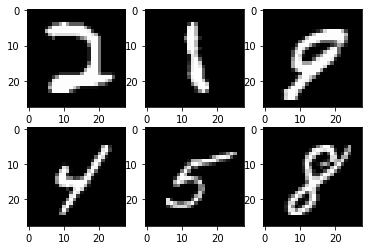

In [66]:
#Plot few samples
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray")
plt.show()

In [70]:
#Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_l_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_l_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_l_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_l_size, num_classes)

#Loss and optimizer
loss = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

#Training
total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        #Reshaping and loading on the device
        images = images.reshape(-1,28*28)
        images = images.to(device)
        labels = labels.to(device)

        #Forward pass
        pred = model(images)
        #loss
        l = loss(pred, labels)

        #Backward-pass
        l.backward()

        #Optimize
        optimizer.step()
        optimizer.zero_grad()

        if i%100 == 0:
            print(f"{epoch} : {i+1}/{total_steps} : loss={l.item():.4f}")

0 : 1/600 : loss=2.3044
0 : 101/600 : loss=0.3549
0 : 201/600 : loss=0.1461
0 : 301/600 : loss=0.1896
0 : 401/600 : loss=0.1893
0 : 501/600 : loss=0.0911
1 : 1/600 : loss=0.0992
1 : 101/600 : loss=0.2552
1 : 201/600 : loss=0.1213
1 : 301/600 : loss=0.1062
1 : 401/600 : loss=0.0483
1 : 501/600 : loss=0.0456


In [71]:

#Testing
with torch.no_grad():
    total_test_samples = 0
    total_correct_preds = 0

    for i, (images, labels) in enumerate(test_loader):
        #Reshaping and loading on the device
        images = images.reshape(-1,28*28)
        images = images.to(device)
        labels = labels.to(device)

        preds = model(images)

        #value, index
        _, pred_labels = torch.max(preds, 1)
        total_test_samples += images.shape[0]
        total_correct_preds += (pred_labels == labels).sum().item()
    
    acc = total_correct_preds/total_test_samples * 100
    print(f"acc = {acc}%")

acc = 96.06%
